In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
df=pd.read_csv('D://ML ineuron//olympic DATA analysis//archive//athlete_events.csv')
region_df=pd.read_csv("D://ML ineuron//olympic DATA analysis//archive//noc_regions.csv")

# SUMMER OLYMPICS DATASET 
#### S_df = summer olympics data set 
#### W_df= winter olympics data set 

In [145]:
df.Season.unique()   # unique values in Season column 

# 'Summer' AND 'Winter'

array(['Summer', 'Winter'], dtype=object)

In [146]:
S_df=df[df['Season']=="Summer"]
W_df=df[df['Season']=="Winter"]


In [147]:
# our analysis will be on summer olympics dataset since its more popular one among tropic and equatorial regions 


In [148]:
# NOC IS A COMMON COLUMN !WE WILL  JOIN TWO TABLES  REGION_DF AND DF WITH MATCHING THEM 

In [149]:
S_df=S_df.merge(region_df,on='NOC',how='left')


In [150]:
S_df['region'].unique().shape   #  take care of historic issue ex=germany ,Russia 

(206,)

In [151]:
S_df.duplicated().sum()

1385

# MEDAL TALLY 

In [152]:
S_df['Medal'].value_counts()

Gold      11459
Bronze    11409
Silver    11220
Name: Medal, dtype: int64

In [153]:
S_df=pd.concat( [ S_df, pd.get_dummies(S_df['Medal']) ] ,axis=1 )   # adding one hot encoded df to orignal summer dataframe

In [154]:
# sorting nations by medal tally 


In [155]:
S_df.groupby('NOC').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()

# this medal tally is wrong because a win in team sports is counted as one medal ,
# but here all medals are counted by every individual member

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,636.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [156]:
#  to count team medals as only one 
# to remove duplicate rows of specific columns ,
# we are only removing duplicate entries of the same team (hockey has 11 players +reserve)
# medal table does not have all the player names , just number of medal per country 
medal_tally=S_df.drop_duplicates(subset=['Team',"NOC","Games","Year","City","Sport","Event","Medal"])

In [157]:
medal_tally['Medal'].value_counts()

Bronze    5612
Gold      5246
Silver    5216
Name: Medal, dtype: int64

In [158]:
medal_tally=medal_tally.groupby('NOC').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()
medal_tally['Total Medals']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']
#  now it is very close to medal tallly till 2016 olympics  
# there are still discrepanices which can be awarded to updated countries / banned countres  etc .

In [159]:
medal_tally

,NOC,Gold,Silver,Bronze,Total Medals
0,USA,1035.0,802.0,708.0,2545.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,317.0,300.0,895.0
3,GER,235.0,261.0,283.0,779.0
4,FRA,234.0,256.0,287.0,777.0
...,...,...,...,...,...
225,AHO,0.0,1.0,0.0,1.0
226,LBR,0.0,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0,0.0
228,LES,0.0,0.0,0.0,0.0


# Seperating table by years and coutry


In [160]:
Years=S_df.Year.unique().tolist()
Years.sort()
Years.insert(0,'Overall')



In [161]:
country=S_df['region'].dropna().unique().tolist()
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

# Function for medal tally by year for all countries 

In [162]:
def fetch_medaltally(year,country,S_df):
    medal_df=S_df.drop_duplicates(subset=['Team',"NOC","Games","Year","City","Sport","Event","Medal"])
    flag=0
    if year=="Overall" and country=="Overall":
        temp_df=medal_df
        flag=0
    if year=="Overall" and country != "Overall":
        flag=1
        temp_df=medal_df[medal_df['region']==country]
        
    if year !="Overall" and country =="Overall":
        flag=0
        temp_df=medal_df[medal_df['Year']==int(year)]
        
    if year!="Overall" and country !="Overall":
        temp_df=medal_df[(medal_df['Year']==year) &(medal_df['region']==country)]
        flag=0
    
        
        
    if flag==0:        
        temp_df=temp_df.groupby('region').sum()[["Gold","Silver","Bronze"]].sort_values(by=['Gold','Silver','Bronze'],ascending=[False,False,False]).reset_index()


    elif flag==1:
        temp_df=temp_df.groupby('Year').sum()[["Gold","Silver","Bronze"]].sort_values("Year",ascending=True).reset_index()
        
    temp_df["Total Medals"]= temp_df['Gold']+ temp_df['Silver']+ temp_df['Bronze']
    return temp_df
        
        


        


In [163]:
fetch_medaltally("Overall","Overall",S_df)['Total Medals']


0      2545.0
1      1577.0
2      1392.0
3       895.0
4       777.0
        ...  
200       0.0
201       0.0
202       0.0
203       0.0
204       0.0
Name: Total Medals, Length: 205, dtype: float64

# OVERALL ANALYSIS 






In [164]:
# finding out number of editions 
total_edition=S_df['Year'].nunique() # till 2016 28 editions were held  ,1906 was later expunged from the official records 

In [165]:
#NO. OF CITIES/hosts
cities_list=S_df.groupby(['Year'])['City'].unique()
total_citie=S_df['City'].nunique()


In [166]:
# no of sports played by year
sports_list=S_df.groupby(['Year'])['Sport'].nunique()
total_sports=S_df['Sport'].nunique()


In [167]:
# no of events played by year
total_event=S_df['Event'].nunique()

# ___________________________________Year vs number of Events_____________________________________
event_list=S_df.groupby(['Year'])['Event'].nunique()
event_list=event_list.to_frame().reset_index()
event_list.rename(columns={"Year":"Edition"},inplace=True)
event_list

,Edition,Event
0,1896,43
1,1900,90
2,1904,95
3,1906,74
4,1908,109
5,1912,107
6,1920,158
7,1924,131
8,1928,122
9,1932,131


In [168]:
total_athlete=S_df['Name'].nunique()

athlete_list=S_df.groupby(['Year'])['Name'].nunique()
athlete_list=athlete_list.to_frame().reset_index()
athlete_list.rename(columns={"Year":"Edition"},inplace=True)
athlete_list.rename(columns={"Name":"No.of Athletes"},inplace=True)


# Change name to number of athletes

In [169]:
total_country=S_df['region'].nunique()
country_list=S_df.groupby(['Year'])['region'].nunique()
country_list=country_list.to_frame().reset_index()
# country_list.rename(columns=['region':'n'])
country_list.rename(columns={"region": "No. of participating nations","Year":"Edition"},inplace=True)
country_list

,Edition,No. of participating nations
0,1896,12
1,1900,31
2,1904,14
3,1906,20
4,1908,22
5,1912,28
6,1920,29
7,1924,45
8,1928,46
9,1932,47


In [170]:
# graph for years vs participation nation

import plotly.express as px
fig = px.line(country_list, x="Edition",y='No. of participating nations', title='Years vs Participation nation')
fig.show()


In [171]:
# graph for Year vs number of Events
fig = px.line(event_list, x="Edition",y='Event', title='Edition vs Events')
fig.show()


<AxesSubplot:xlabel='Year', ylabel='Sport'>

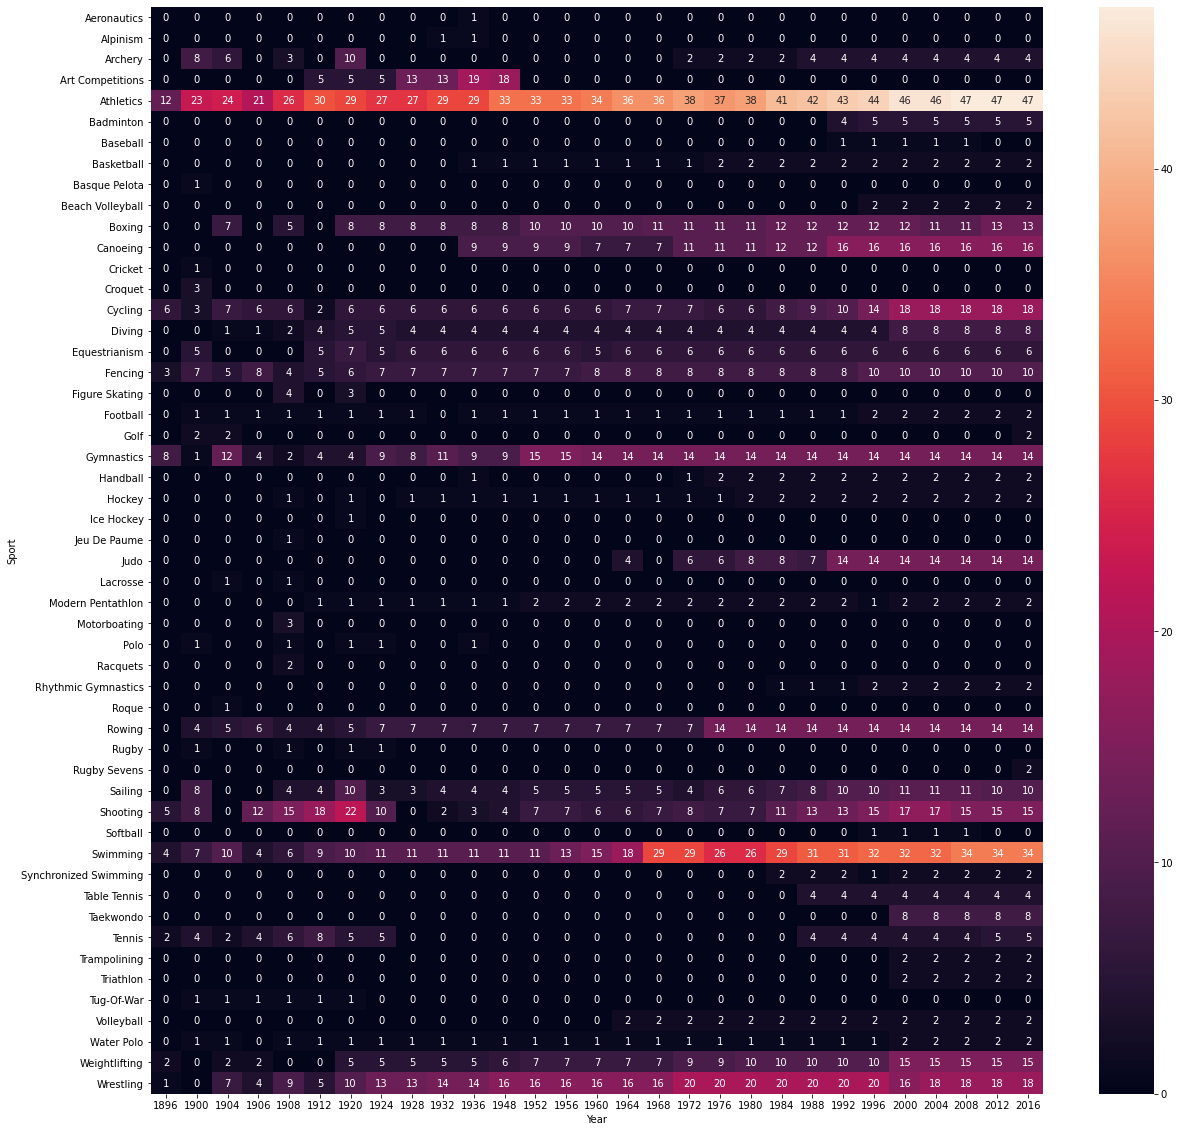

In [172]:
#Heatmap for no of events by sports
x=S_df.drop_duplicates(subset=['Year','Sport',"Event"])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [173]:
# functon which filters the data by sports and tell which athlete won the most number no of medals
def most_succesful(S_df,sport):
    if sport=="Overall":
        a=S_df.dropna(subset=['Medal']).groupby(['Name','Sport','region']).sum()[['Gold','Silver','Bronze']]

    if sport!="Overall":
        a=S_df[S_df['Sport']==sport].dropna(subset=['Medal']).groupby(['Name','Sport','region']).sum()[['Gold','Silver','Bronze']]

    a['Total']=a['Gold']+a['Silver']+a['Bronze']
    a=a.drop(columns=['Gold','Silver','Bronze'])

    a=a.sort_values(by=['Total'],ascending=False).reset_index()
    a.rename(columns={'region':'Country','Total':'Medals'},inplace=True)

    return a
    
        
    




# Country wise analysis
###### country wise medal tally per year ( line plot)
###### what sports countries are most good at
######  most succesfu athletes of that country



In [174]:
# 1 number of medals per country in every year   
def country_medal_tally(country,S_df):
    temp=S_df.drop_duplicates(subset=['Team',"NOC","Games","Year","City","Sport","Event","Medal"])
    temp=temp.groupby(['region','Year']).count()[['Medal']].sort_values(by=['Year',],ascending=[False]).reset_index()
    return temp[temp['region']==country]



In [175]:
fig = px.line(country_medal_tally('India',S_df), x="Year",y='Medal', title='Year vs number of medals won')
fig.show()

In [176]:
# 2  table of  number of medals won by each country in every sport (with heatmap )

In [181]:
def country_event_heatmap(country,S_df):
    a=S_df[S_df['region']==country].drop_duplicates(subset=['Team',"NOC","Games","Year","City","Sport","Event","Medal"]).dropna(subset=['Medal'])
    a=a.groupby(['Year','Sport']).count()['Medal'].reset_index()
    plt.figure(figsize=(20,20))
    a.pivot_table(index='Sport',columns='Year',values='Medal').fillna(0).astype(int)
    sns.heatmap(a.pivot_table(index='Sport',columns='Year',values='Medal').fillna(0).astype(int),annot=True)


In [182]:
# 3 most succesfu athletes of that country(overall)
#country as input


In [183]:
# functon which filters the data by sports and tell which athlete won the most number no of medals
def succesful_athletes_bycountry(S_df,country):

    a=S_df[S_df['region']==country].dropna(subset=['Medal']).groupby(['Name','Sport']).count()[['Medal']].sort_values(by=['Medal'],ascending=False).reset_index().head(20)

    a.rename(columns={'region':'Country'},inplace=True)

    return a
    
        

In [184]:
succesful_athletes_bycountry(S_df,"India")

,Name,Sport,Medal
0,Leslie Walter Claudius,Hockey,4
1,Udham Singh Kular,Hockey,4
2,"Victor John ""V. J."" Peter",Hockey,3
3,Shankar Pillay Laxman,Hockey,3
4,Richard James Allen,Hockey,3
5,Ranganathan Francis,Hockey,3
6,Randhir Singh Gentle,Hockey,3
7,Harbinder Singh Chimni,Hockey,3
8,"Balbir Singh Dosanjh, Sr.",Hockey,3
9,Balbir Singh,Hockey,3


# ATHLETE WISE INFORMATION 
#### by sex,age ,height ,weight

In [185]:
import plotly.figure_factory as ff


In [245]:
athlete_df=S_df.drop_duplicates(subset=['Name','region'])
x=[athlete_df['Age'].dropna(), athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna(), athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna() , athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()]

fig=ff.create_distplot([x[0],x[1],x[2],x[3]],['Age Distribution','Gold medallist','Silver medallist','bronze medallist'],show_hist=False,show_rug=False)
fig.show()

In [246]:
famous_sports=S_df[S_df['Year']==2016].drop_duplicates('Sport')['Sport'].tolist()
x=[]             # ages
name=[]
for sport in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sport].reset_index()
    x.append(temp_df[temp_df['Sport']==sport]['Age'].dropna())
    name.append(sport)
    
    
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



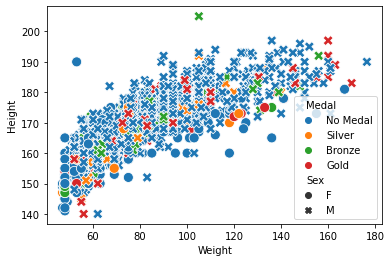

In [273]:
def weight_vs_height(athlete_df):
    athlete_df['Medal'].fillna('No Medal',inplace=True)
    temp_df=athlete_df[athlete_df['Sport']=='Weightlifting']

fig=sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)


In [285]:
S_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [324]:
def males_vs_female(S_df):
    male=S_df[S_df['Sex']=='M'].groupby(by=['Year','Sex']).count()[['Name']].reset_index()
    female=S_df[S_df['Sex']=='F'].groupby(by=['Year','Sex']).count()[['Name']].reset_index()
    temp_df=male.merge(female,on='Year',how='left')
    temp_df.rename(columns={'Name_x':'Males',"Name_y":"Females"},inplace=True)
    temp_df.drop(columns=['Sex_x','Sex_y'],inplace=True)
    return temp_df

    
males_vs_female(S_df)
    # fig=px.line(temp_df,x='Year',y=['Males','Females'])
# fig

,Year,Males,Females
0,1896,380,NaN
1,1900,1903,33.0
2,1904,1285,16.0
3,1906,1722,11.0
4,1908,3054,47.0
5,1912,3953,87.0
6,1920,4158,134.0
7,1924,4989,244.0
8,1928,4588,404.0
9,1932,2622,347.0
